## Reading a .fit

In [25]:
!pip install fitparse
import fitparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Replace 'your_activity.fit' with the actual path to your Garmin FIT file
fit_file = '13435845440_ACTIVITY.fit'

# Create a FitFile instance
fitfile = fitparse.FitFile(fit_file)

# Iterate through messages in the FIT file
for record in fitfile.messages:
    # Print the message type
    print("Message type:", record.name)

    # Iterate through fields in the message
    for data in record:
        print(f"  {data.name}: {data.value}")

    print("\n---\n")

Message type: file_id
  garmin_product: 3113
  manufacturer: garmin
  number: None
  serial_number: 3436769750
  time_created: 2024-01-09 18:00:03
  type: activity
  unknown_7: None

---

Message type: file_creator
  hardware_version: None
  software_version: 1300
  unknown_2: None

---

Message type: unknown_288
  unknown_0: None
  unknown_1: None
  unknown_2: None
  unknown_253: 1073757603

---

Message type: unknown_327
  unknown_0: 9
  unknown_1: 1
  unknown_2: 2
  unknown_253: 1073757603
  unknown_3: 12
  unknown_4: 8352
  unknown_5: 4
  unknown_6: 0

---

Message type: unknown_326
  unknown_0: 41
  unknown_1: None
  unknown_253: 1073757603

---

Message type: unknown_327
  unknown_0: 9
  unknown_1: 1
  unknown_2: 2
  unknown_253: 1073757603
  unknown_3: 12
  unknown_4: 8352
  unknown_5: 4
  unknown_6: 0

---

Message type: unknown_326
  unknown_0: 49
  unknown_1: 3
  unknown_253: 1073757603

---

Message type: event
  event: timer
  event_group: 0
  event_type: start
  timer_trig

In [22]:
RR_values = []
# Iterate through messages in the FIT file
for record in fitfile.messages:
    if record.name == 'hrv':  # Check if the message is of type 'hrv'
        # Iterate through fields in the 'hrv' message
        for field in record:
            if field.name == 'time':  # Check if the field is 'time'
                # Add the first value to the array
                RR_values.append(field.value[0])

RR_values = np.array(RR_values)
RR_values.sum()

1704.174

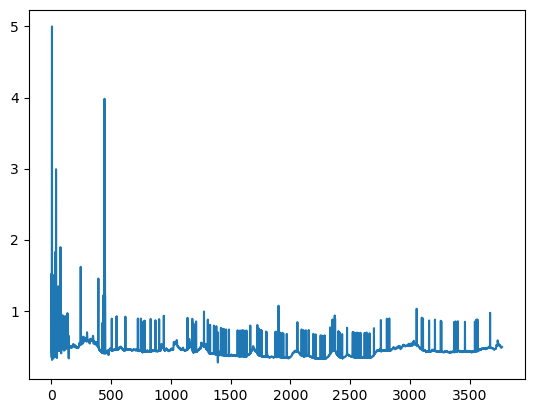

In [23]:
plt.plot(RR_values)

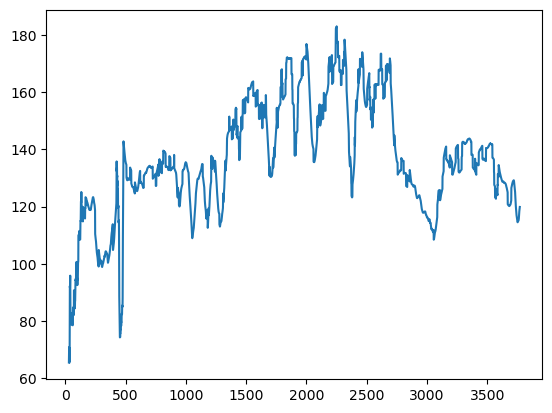

In [32]:
df = pd.DataFrame(RR_values)
df['avg_RR'] = df[0].rolling(30).mean()
df['bpm'] = 60/df['avg_RR']
plt.plot(df['bpm'])